In [1]:
import os
import cv2
import json
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
def get_inner_files(path, extension):
    files = {
        os.path.relpath(os.path.join(root, fname), start=path)
        for root, _, files in os.walk(path)
        for fname in files
        if os.path.splitext(fname)[1].lower() == f".{extension}"
    }
    return sorted(files)

In [3]:
PALETTE = [
    (220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230), (106, 0, 228),
    (0, 60, 100), (0, 80, 100), (0, 0, 70), (0, 0, 192), (250, 170, 30),
    (100, 170, 30), (220, 220, 0), (175, 116, 175), (250, 0, 30), (165, 42, 42),
    (255, 77, 255), (0, 226, 252), (182, 182, 255), (0, 82, 0), (120, 166, 157),
    (110, 76, 0), (174, 57, 255), (199, 100, 0), (72, 0, 118), (255, 179, 240),
    (0, 125, 92), (209, 0, 151), (188, 208, 182), (0, 220, 176),
]
CLASSES = [
    'finger-1', 'finger-2', 'finger-3', 'finger-4', 'finger-5',
    'finger-6', 'finger-7', 'finger-8', 'finger-9', 'finger-10',
    'finger-11', 'finger-12', 'finger-13', 'finger-14', 'finger-15',
    'finger-16', 'finger-17', 'finger-18', 'finger-19', 'Trapezium',
    'Trapezoid', 'Capitate', 'Hamate', 'Scaphoid', 'Lunate',
    'Triquetrum', 'Pisiform', 'Radius', 'Ulna',
]

class2ind = {v: i for i, v in enumerate(CLASSES)}

def label2rgb(label):
    image_size = label.shape[1:] + (3, )
    image = np.zeros(image_size, dtype=np.uint8)
    
    for i, class_label in enumerate(label):
        image[class_label == 1] = PALETTE[i]
        
    return image

In [4]:
image_path = "/opt/ml/level2_cv_semanticsegmentation-cv-01/data/train/DCM"
label_path = "/opt/ml/level2_cv_semanticsegmentation-cv-01/data/train/outputs_json"
image_dataset = np.array(get_inner_files(image_path, "png"))
label_dataset = np.array(get_inner_files(label_path, "json"))

In [11]:
i = 0

In [6]:
def get(image_file, label_file):
    
    image_np = cv2.imread(os.path.join(image_path, image_file)) / 255.0

    label_shape = tuple(image_np.shape[:2]) + (len(CLASSES),)
    label = np.zeros(label_shape, dtype=np.uint8)

    # read label file
    with open(os.path.join(label_path, label_file), "r") as f:
        annotations = json.load(f)
    annotations = annotations["annotations"]

    # iterate each class
    for ann in annotations:
        c = ann["label"]
        class_ind = class2ind[c]
        points = np.array(ann["points"])

        # polygon to mask
        class_label = np.zeros(image_np.shape[:2], dtype=np.uint8)
        cv2.fillPoly(class_label, [points], 1)
        label[..., class_ind] = class_label

    label = label.transpose(2, 0, 1)
    return image_np, label

ID082/image1661737564551.png ID082/image1661737564551.json


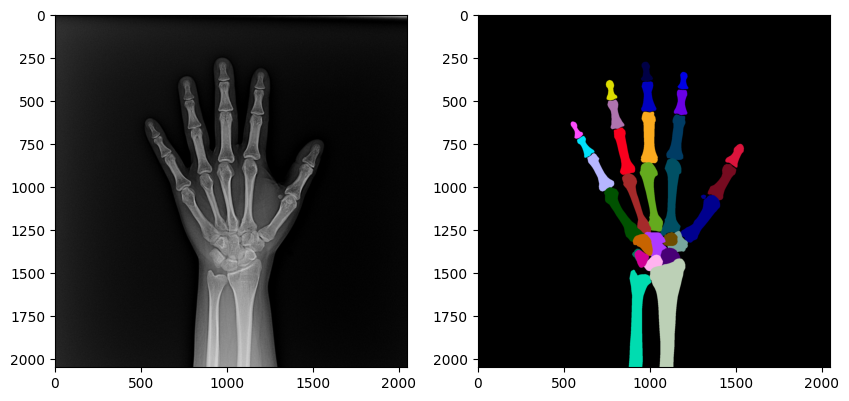

In [153]:
image_file = image_dataset[i]
label_file = label_dataset[i]
print(image_file, label_file)

image_np, label = get(image_file, label_file)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image_np)
ax[1].imshow(label2rgb(label))

# legend_elements = [Patch(facecolor=[c / 255 for c in color], label=CLASSES[i]) for i, color in enumerate(PALETTE)]
# plt.legend(handles=legend_elements)
plt.show()

i += 1

ID363/image1664935962797.png ID363/image1664935962797.json


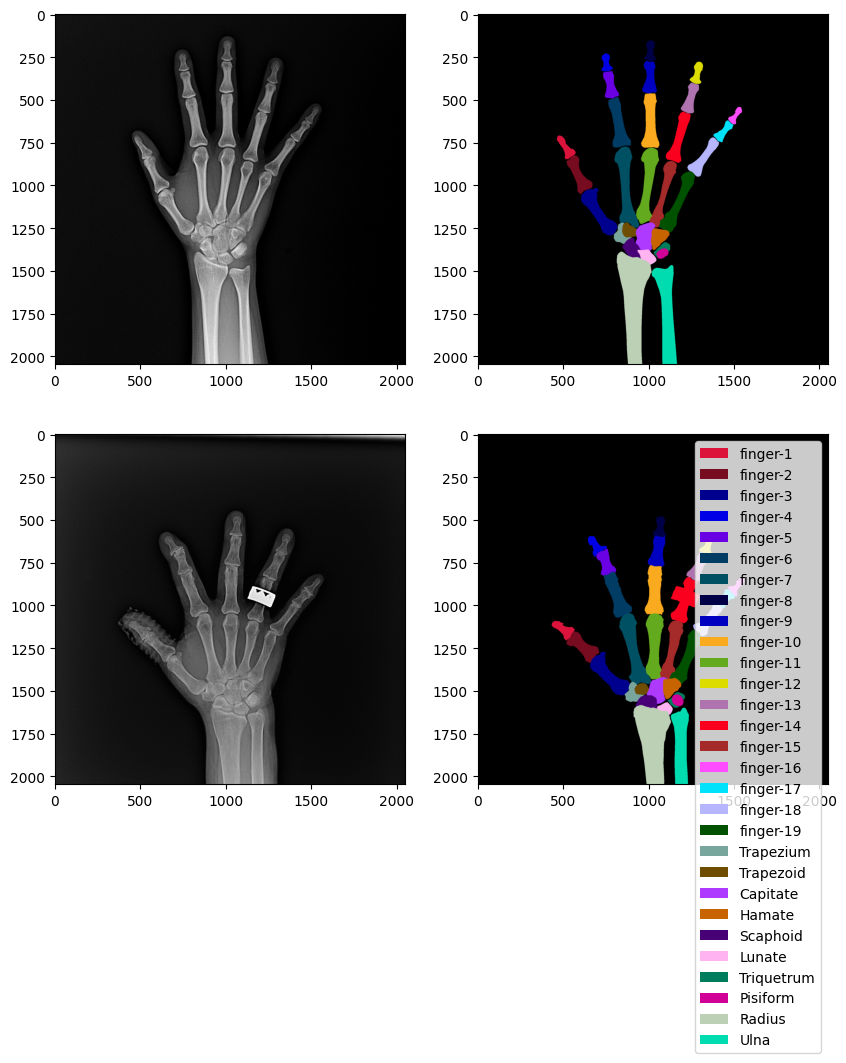

In [7]:
image_file_ = image_dataset[i]
label_file_ = label_dataset[i]

image_file = "ID363/image1664935962797.png"
label_file = "ID363/image1664935962797.json"
print(image_file, label_file)

image_np_, label_ = get(image_file_, label_file_)
image_np, label = get(image_file, label_file)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].imshow(image_np_)
ax[0][1].imshow(label2rgb(label_))
ax[1][0].imshow(image_np)
ax[1][1].imshow(label2rgb(label))

# legend_elements = [Patch(facecolor=[c / 255 for c in color], label=CLASSES[i]) for i, color in enumerate(PALETTE)]
# plt.legend(handles=legend_elements)
plt.show()

i += 1

In [9]:
def get_json(image_file, label_file):
    image_np = cv2.imread(os.path.join(image_path, image_file)) / 255.0

    label_shape = tuple(image_np.shape[:2]) + (len(CLASSES),)
    label = np.zeros(label_shape, dtype=np.uint8)

    # read label file
    with open(os.path.join(label_path, label_file), "r") as f:
        annotations = json.load(f)
    annotations = annotations["annotations"]

    # iterate each class
    for ann in annotations:
        c = ann["label"]
        class_ind = class2ind[c]
        points = np.array(ann["points"])

        # polygon to mask
        class_label = np.zeros(image_np.shape[:2], dtype=np.uint8)
        cv2.fillPoly(class_label, [points], 1)
        label[..., class_ind] = class_label
    return label

In [9]:
l = get_json(image_file_, label_file_)
numpy_name = label_file_.split('.')
numpy_path = "/opt/ml/level2_cv_semanticsegmentation-cv-01/data/train/outputs_numpy"
folder_name = os.path.join(numpy_path,label_file_.split('/')[0])
file_name = os.path.join(numpy_path, f"{numpy_name[0]}.npy")
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
np.save(file_name, l)

In [13]:
image_file_ = image_dataset[i]
label_file_ = label_dataset[i]

image_file = "ID469/image1666659964131.png"
label_file = "ID469/image1666659964131.json"
print(image_file, label_file)

image_np_, label_ = get(image_file_, label_file_)
image_np, _ = get(image_file, label_file)
label = np.load(file_name).transpose(2, 0, 1)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].imshow(image_np_)
ax[0][1].imshow(label2rgb(label_))
ax[1][0].imshow(image_np)
ax[1][1].imshow(label2rgb(label))

# legend_elements = [Patch(facecolor=[c / 255 for c in color], label=CLASSES[i]) for i, color in enumerate(PALETTE)]
# plt.legend(handles=legend_elements)
plt.show()

ID469/image1666659964131.png ID469/image1666659964131.json


FileNotFoundError: [Errno 2] No such file or directory: '/opt/ml/level2_cv_semanticsegmentation-cv-01/data/train/outputs_numpy/ID548/image1667354167046.npy'

In [11]:
def save_numpy(image_file, label_file):
    l = get_json(image_file, label_file).transpose(2, 0, 1)

    numpy_name = label_file.split('.')
    numpy_path = "/opt/ml/level2_cv_semanticsegmentation-cv-01/data/train/outputs_numpy"
    
    folder_name = os.path.join(numpy_path,label_file.split('/')[0])
    file_name = os.path.join(numpy_path, f"{numpy_name[0]}.npz")

    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    np.savez_compressed(file_name, l)

In [12]:
for i in range(len(image_dataset)):
    save_numpy(image_dataset[i], label_dataset[i])

KeyboardInterrupt: 

In [ ]:
numpy_path = "/opt/ml/level2_cv_semanticsegmentation-cv-01/data/train/outputs_numpy"
numpy_dataset = np.array(get_inner_files(numpy_path, "npz"))

In [ ]:
import time

for i in range(len(image_dataset)):
    start = time.time()
    n = np.load(numpy_dataset[i])
    mid = time.time()
    l = get_json(image_dataset[i], label_dataset[i])
    end = time.time()
    print(f"numpy load : {mid-start}s\t json load : {end-mid}s")
    if n != l:
        print(label_dataset[i])